In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import imageio

## Draw a histogram


In [84]:
lifeexp = pd.read_excel('resources/gapminder_lifeexpectancy.xlsx', engine='openpyxl')

In [85]:
lifeexp.head()

,Life expectancy,1800.0,1801.0,1802.0,1803.0,1804.0,1805.0,1806.0,1807.0,1808.0,...,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


In [86]:
lifeexp_reduced = lifeexp[[1950, 1975, 2000, 2015]]

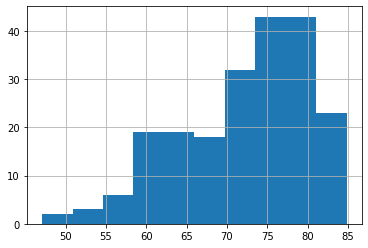

In [87]:
lifeexp_reduced[2015].hist()
plt.savefig('histo.png')

<AxesSubplot:>

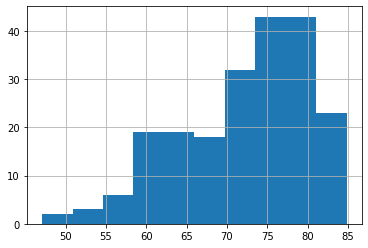

In [88]:
lifeexp_reduced[2015].hist()

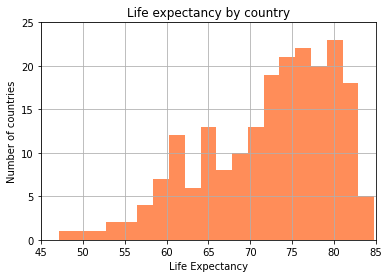

In [89]:
lifeexp_reduced[2015].hist(bins=20, facecolor='#ff5000',alpha=0.65,
histtype='bar',)
plt.title('Life expectancy by country')
plt.xlabel('Life Expectancy')
plt.ylabel('Number of countries')
plt.axis([45, 85, 0, 25])
plt.savefig('histo.svg', dpi=150)

## Draw a bar plot


In [90]:
fert = pd.read_csv('resources/gapminder_total_fertility.csv', index_col=0)
fert.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Total fertility rate,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.70,6.46,6.20,5.93,5.66,5.40,5.14,4.90,4.68,4.47
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.85,1.80,1.76,1.74,1.74,1.75,1.76,1.77,1.78,1.78
Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.58,2.66,2.73,2.78,2.82,2.83,2.82,2.80,2.76,2.71


In [91]:
fert_reduced = fert[['1950', '1955', '2000']]


In [92]:
fert_reduced = fert_reduced.loc[['Germany', 'India', 'Bulgaria', 'Kenya']]

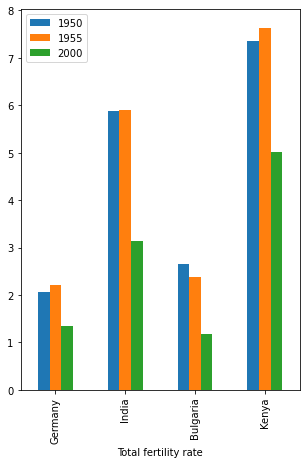

In [93]:
from matplotlib import pyplot as plt
fert_reduced.plot.bar(figsize=(5,7))
plt.savefig('bars.png')


<AxesSubplot:xlabel='Total fertility rate'>

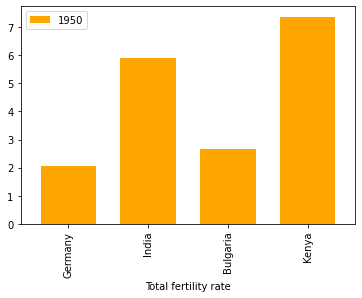

In [94]:
fert_reduced.plot.bar(y='1950', width=0.7, color='orange')


## Animated scatterplot

### Load and format data

#### Population data

In [95]:
pop = pd.read_excel('resources/gapminder_population.xlsx', engine='openpyxl')
pop.rename(columns = {'Total population':'country'}, inplace=True)
pop = pop.melt(id_vars='country', var_name='year', value_name='population')

pop.head()

,country,year,population
0,Abkhazia,1800.0,NaN
1,Afghanistan,1800.0,3280000.0
2,Akrotiri and Dhekelia,1800.0,NaN
3,Albania,1800.0,410445.0
4,Algeria,1800.0,2503218.0


#### Life expectancy data

In [96]:
lifeexp = pd.read_excel('resources/gapminder_lifeexpectancy.xlsx', engine='openpyxl')
lifeexp.columns

Index(['Life expectancy',            1800.0,            1801.0,
                  1802.0,            1803.0,            1804.0,
                  1805.0,            1806.0,            1807.0,
                  1808.0,
       ...
                  2007.0,            2008.0,            2009.0,
                  2010.0,            2011.0,            2012.0,
                  2013.0,            2014.0,            2015.0,
                  2016.0],
      dtype='object', length=218)

In [97]:
lifeexp.set_index('Life expectancy', inplace=True)
lifeexp.index.name = 'country'
lifeexp.reset_index(inplace=True)
lifeexp = lifeexp.melt(id_vars='country', var_name='year', value_name='life_expectancy')
lifeexp.head()

,country,year,life_expectancy
0,Abkhazia,1800.0,NaN
1,Afghanistan,1800.0,28.21
2,Akrotiri and Dhekelia,1800.0,NaN
3,Albania,1800.0,35.40
4,Algeria,1800.0,28.82


#### Fertility data

In [98]:
fert.columns = fert.columns.astype(int)
fert.index.name = 'country'
fert = fert.reset_index()
fert = fert.melt(id_vars='country', var_name='year', value_name='fertility_rate')
fert.head()

,country,year,fertility_rate
0,Abkhazia,1800,NaN
1,Afghanistan,1800,7.00
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,4.60
4,Algeria,1800,6.99


In [99]:
fert_1800 = fert[fert['year'] == 1800]
fert_1800

,country,year,fertility_rate
0,Abkhazia,1800,NaN
1,Afghanistan,1800,7.00
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,4.60
4,Algeria,1800,6.99
...,...,...,...
255,Yugoslavia,1800,NaN
256,Zambia,1800,6.71
257,Zimbabwe,1800,6.75
258,Åland,1800,NaN


#### continents

In [100]:
cont = pd.read_csv('resources/continents.csv', sep=';')
cont

,continent,country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina
...,...,...
189,South America,Paraguay
190,South America,Peru
191,South America,Suriname
192,South America,Uruguay


### Merge into a dataframe

In [101]:
df = fert.merge(pop, how='outer')
df_all = df.merge(lifeexp, how='outer')
df_all.head(20)

/Users/em/opt/anaconda3/lib/python3.9/site-packages/pandas/core/reshape/merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)
/Users/em/opt/anaconda3/lib/python3.9/site-packages/pandas/core/reshape/merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)


,country,year,fertility_rate,population,life_expectancy
0,Abkhazia,1800.0,NaN,NaN,NaN
1,Afghanistan,1800.0,7.00,3280000.0,28.21
2,Akrotiri and Dhekelia,1800.0,NaN,NaN,NaN
3,Albania,1800.0,4.60,410445.0,35.40
4,Algeria,1800.0,6.99,2503218.0,28.82
5,American Samoa,1800.0,NaN,8170.0,NaN
6,Andorra,1800.0,NaN,2654.0,NaN
7,Angola,1800.0,6.93,1567028.0,26.98
8,Anguilla,1800.0,NaN,2025.0,NaN
9,Antigua and Barbuda,1800.0,5.00,37000.0,33.54


In [102]:
df_all = df_all.merge(cont, on='country')

### Create scatterplot of year 2000

<AxesSubplot:xlabel='life_expectancy', ylabel='fertility_rate'>

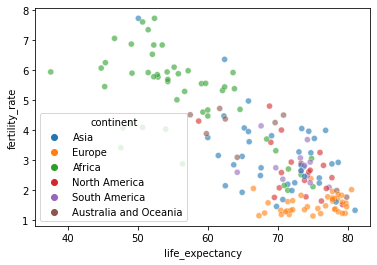

In [103]:
df_subset = df_all[df_all['year'] == 2000]
sns.scatterplot(x='life_expectancy', y='fertility_rate',
            data=df_subset, alpha=0.6, hue='continent')

### Create gif

To create an animated scatterplot showing the correlation between life expectancy and fertility, create one plot for each year between 1960 and 2015 (before that, the data contains too many gaps).

Write a for loop that goes through each year and produces a scatterplot.

Save each scatterplot to a separate file containing the year in the filename, e.g. lifeexp_1999.png. After saving the plot call plt.close() to remove the plot from the notebook.

Hint Use the function plt.axis((xmin, xmax, ymin, ymax)) to fix the coordinates of the plot.

In [104]:
save_path = '/Users/em/Documents/Spiced/repos/random-rose-student-code/week_1/Project_1/figures/'


In [105]:
years_list = []

for year in df_all['year'][df_all['year'] >= 1960].unique():
    years_list.append(int(year))
    
years_list = years_list[:-1]
print(years_list)

[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


In [107]:
import numpy as np 

dict = {}

for population in df_all['population']:
    if np.isnan(population) == False:
        dict[population] = population / 100000
        #print(dict[population])
    
#print(dict)

In [117]:
df_all[df_all['year'] == 1900]

,country,year,fertility_rate,population,life_expectancy,continent
100,Afghanistan,1900.0,7.00,5021241.0,27.19,Asia
317,Albania,1900.0,4.60,819950.0,35.40,Europe
534,Algeria,1900.0,6.99,4946166.0,28.86,Africa
751,Andorra,1900.0,NaN,4393.0,NaN,Europe
968,Angola,1900.0,7.00,2898155.0,26.98,Africa
...,...,...,...,...,...,...
37207,Vietnam,1900.0,4.70,14597795.0,32.00,Asia
37424,Yemen,1900.0,6.88,3183724.0,23.39,Asia
37641,Zambia,1900.0,6.71,743191.0,32.60,Africa
37858,Zimbabwe,1900.0,6.75,1911595.0,33.70,Africa


In [128]:
handles_code = [handles[i] for i in range(7)],[labels[i] for i in range(7)]

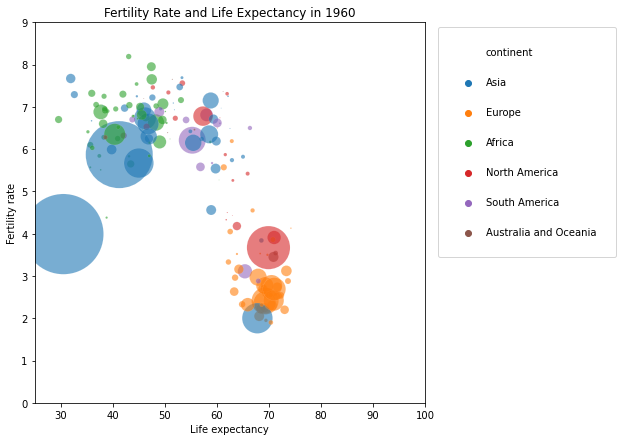

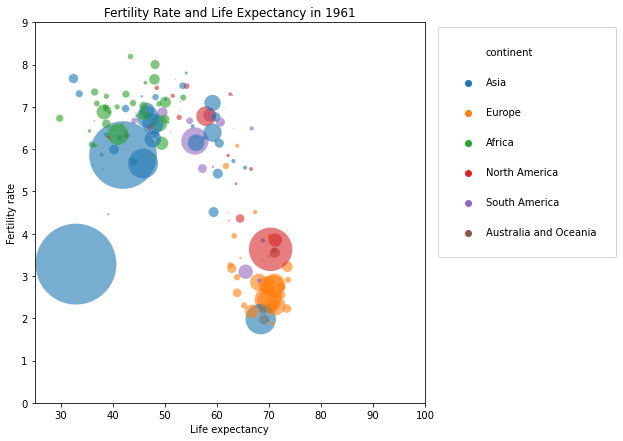

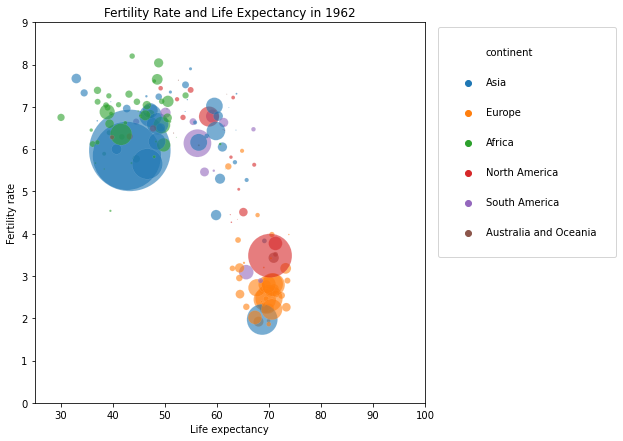

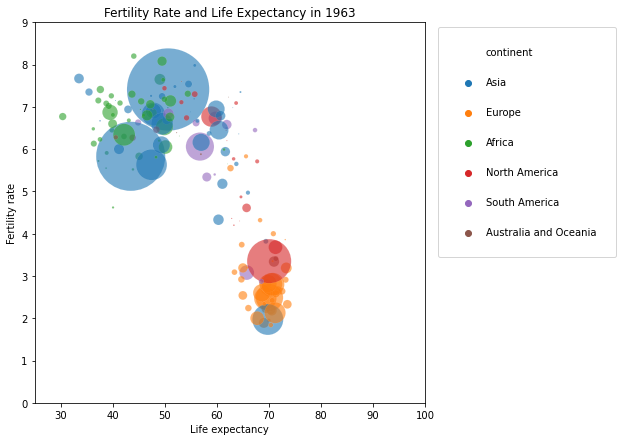

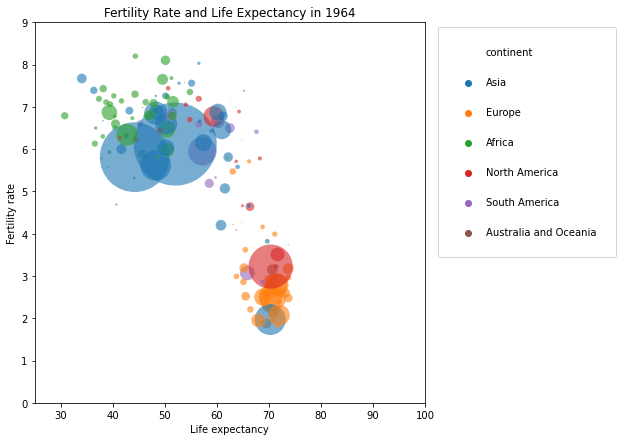

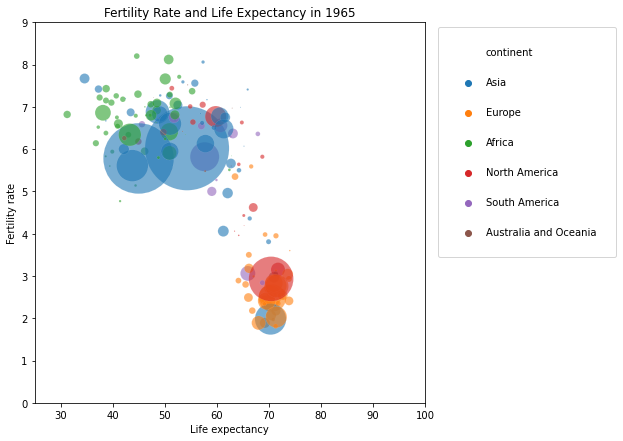

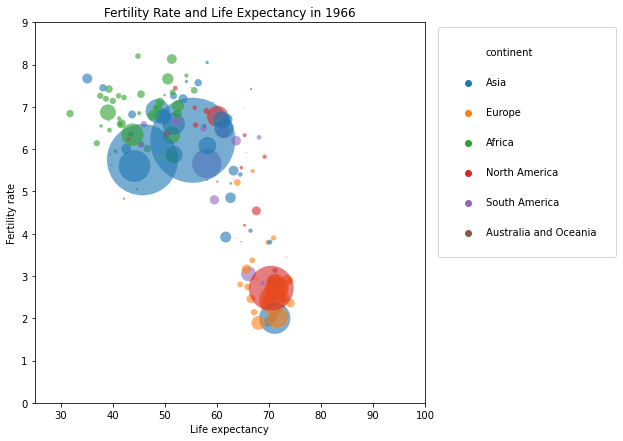

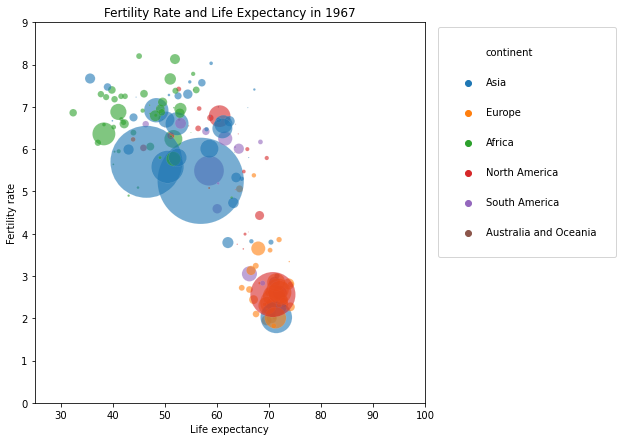

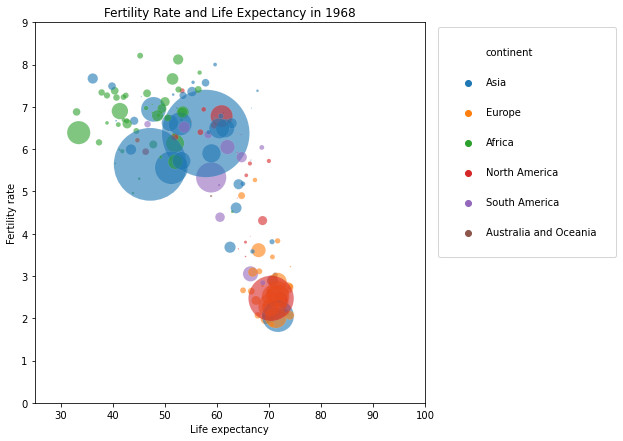

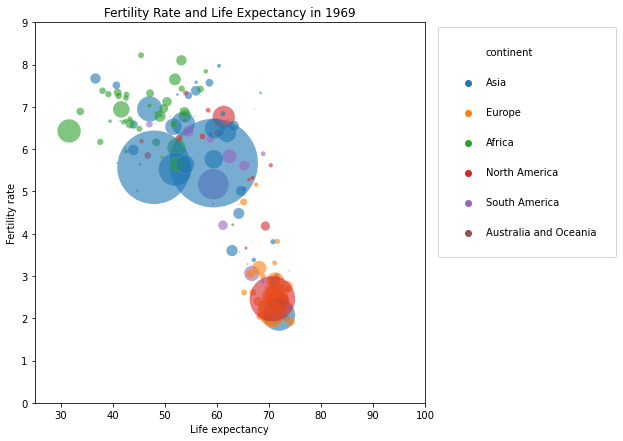

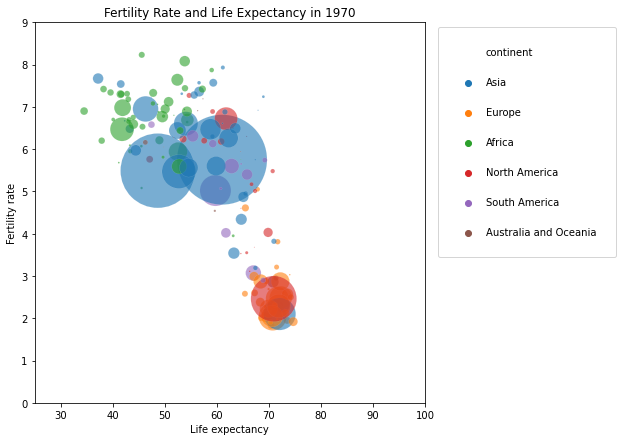

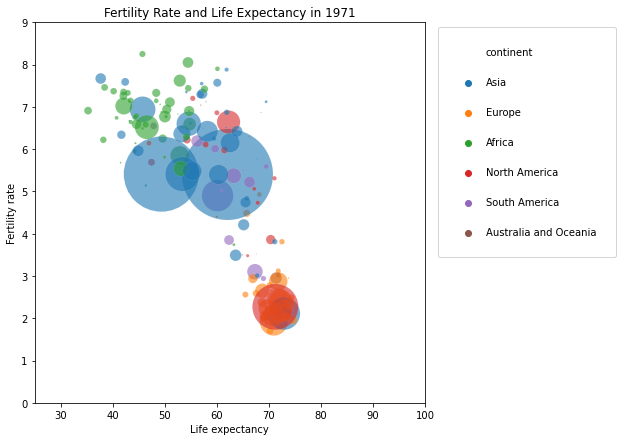

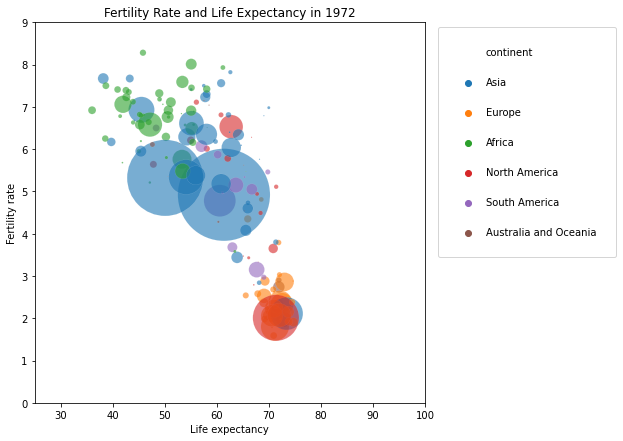

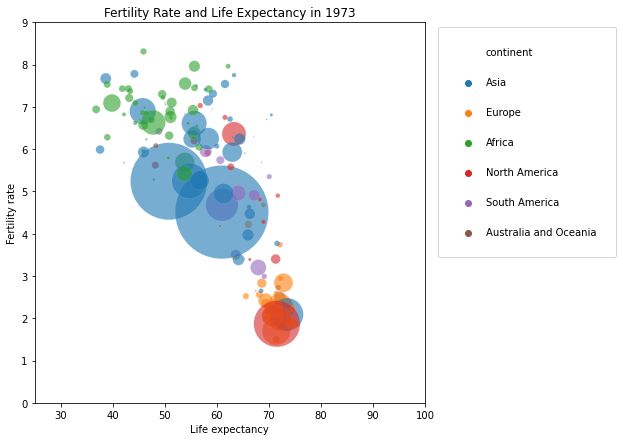

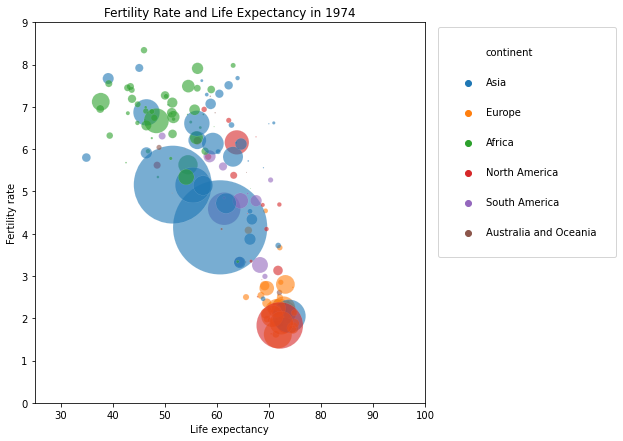

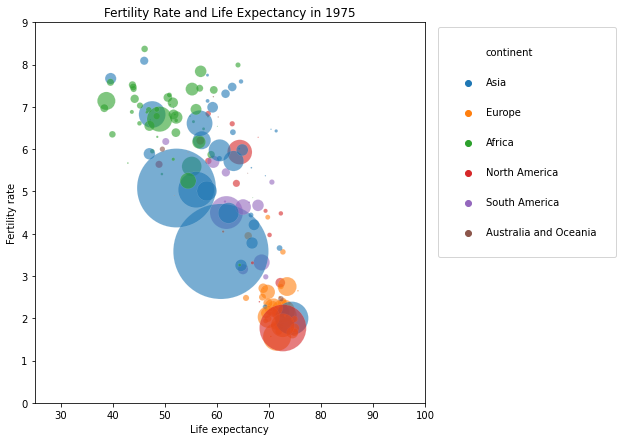

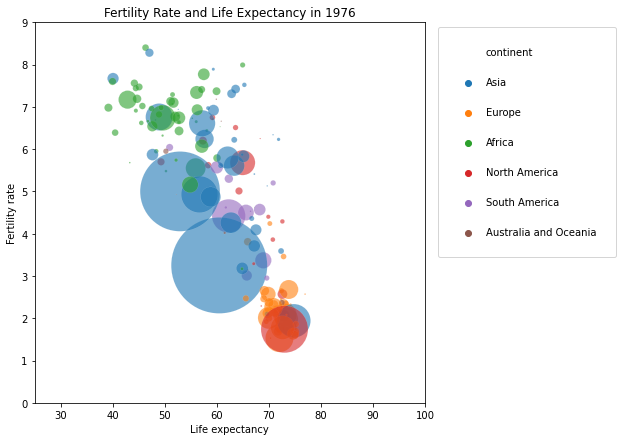

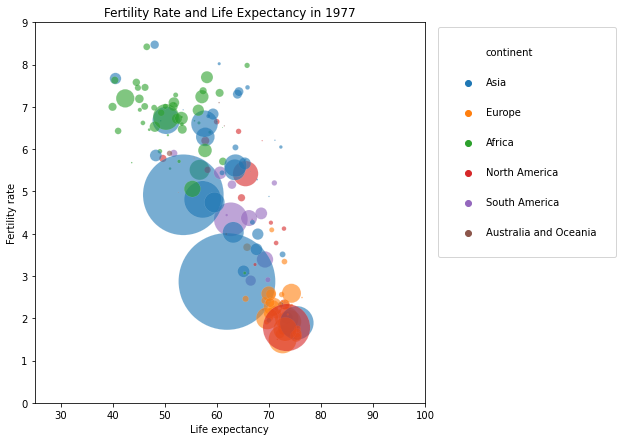

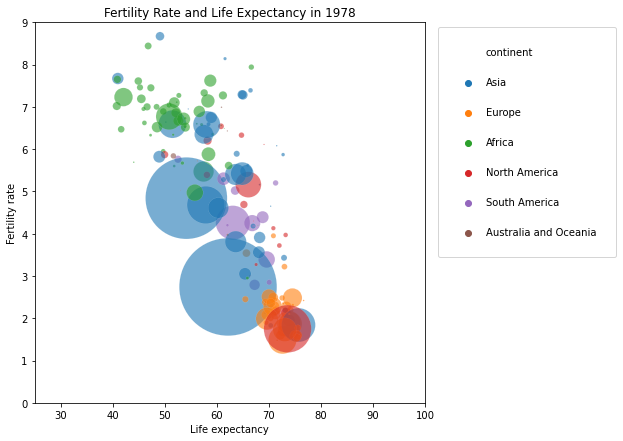

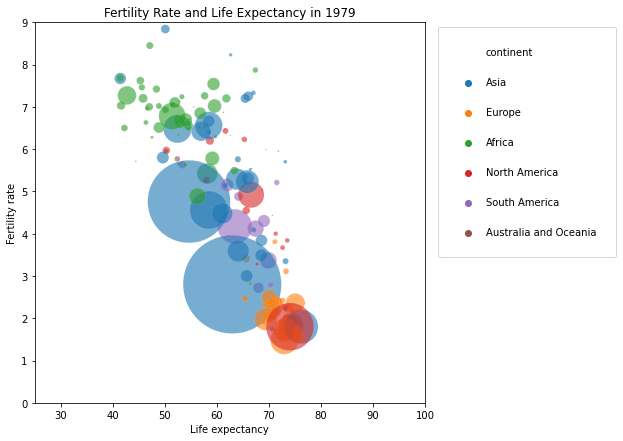

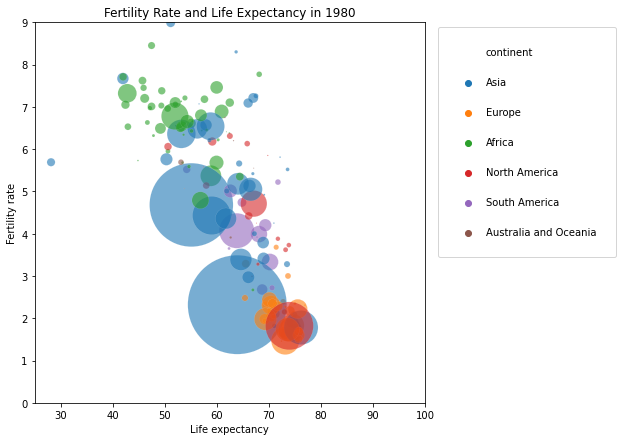

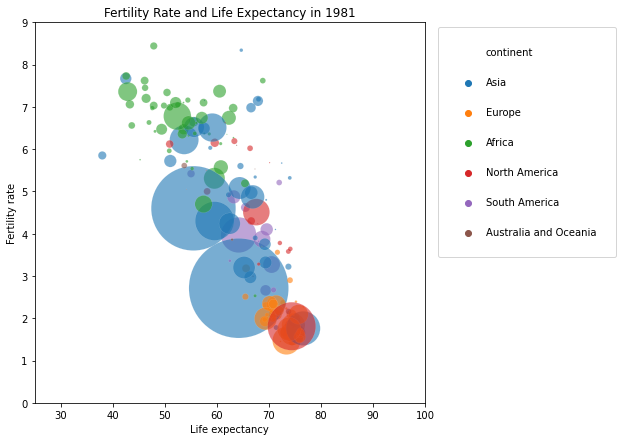

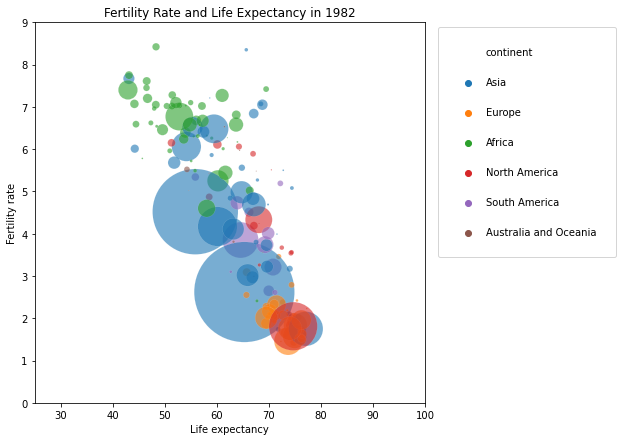

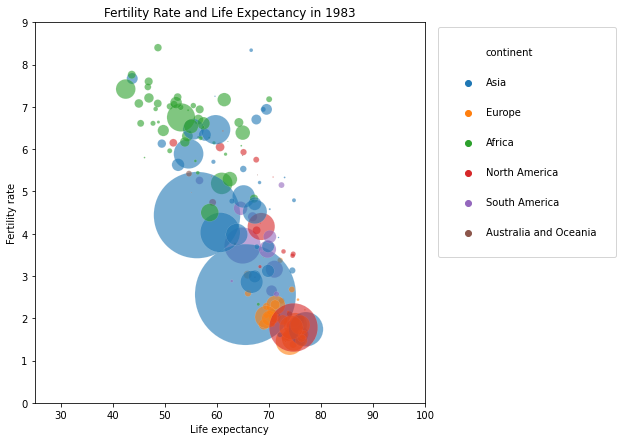

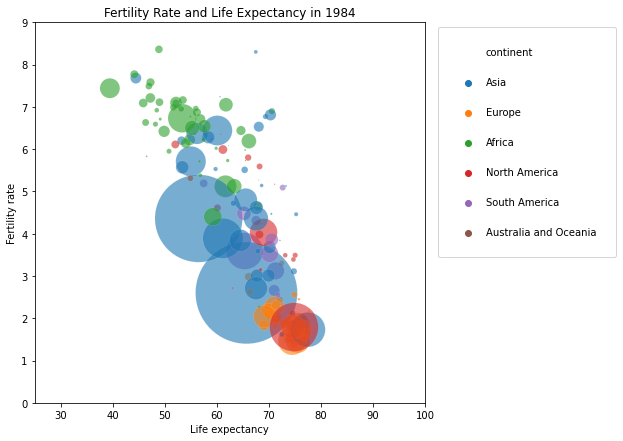

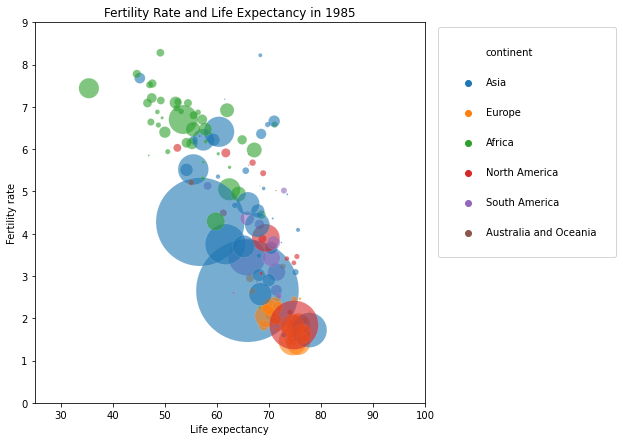

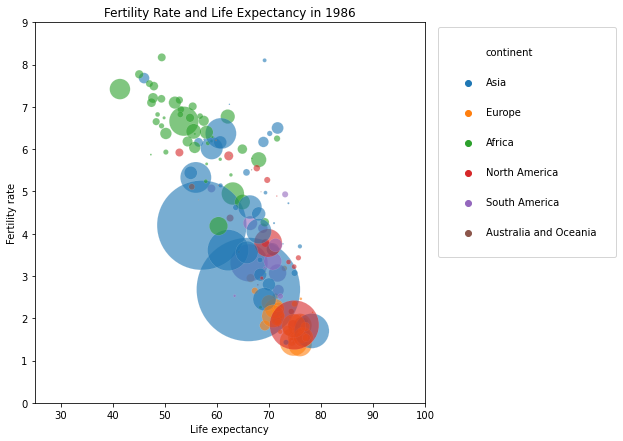

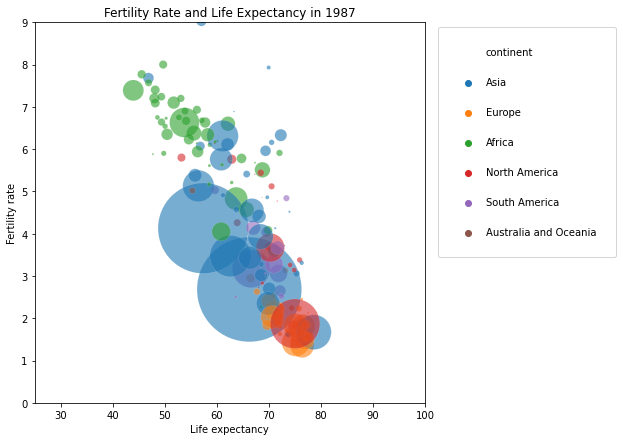

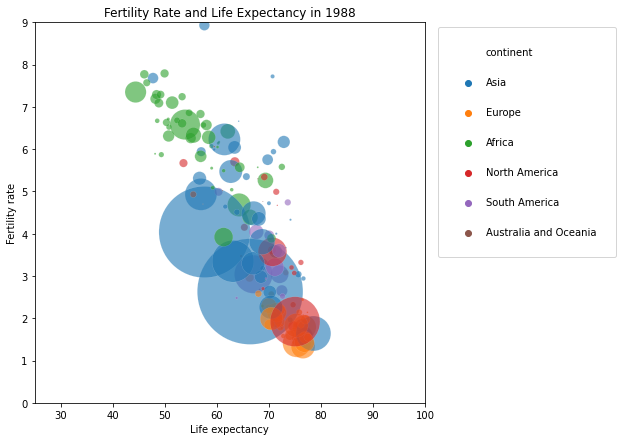

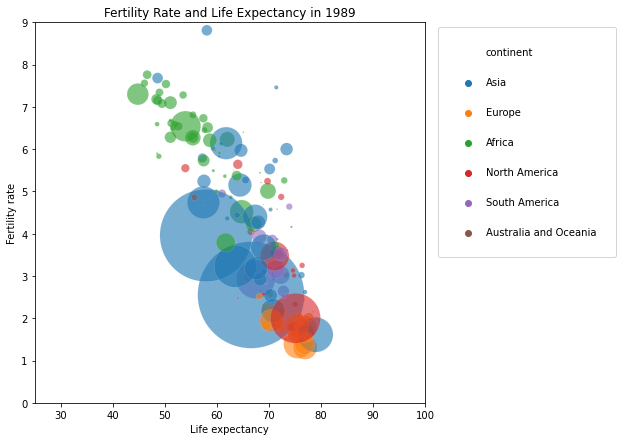

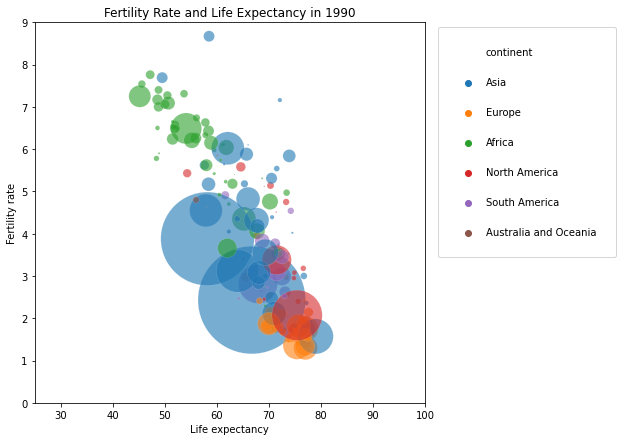

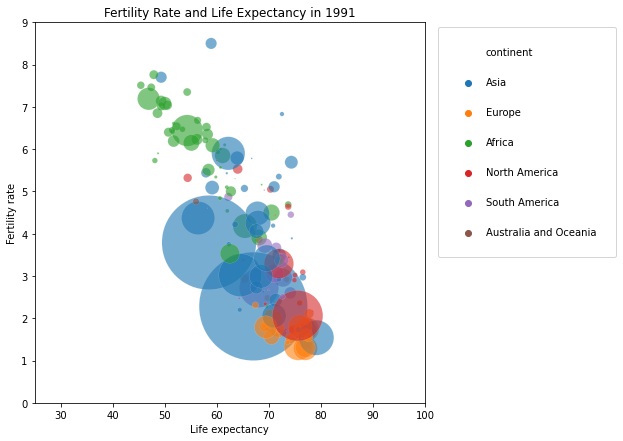

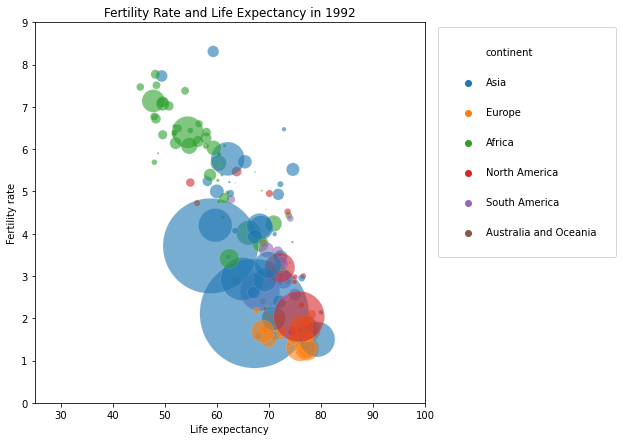

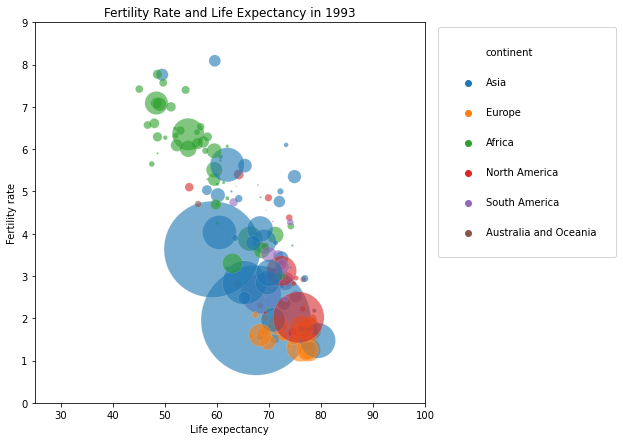

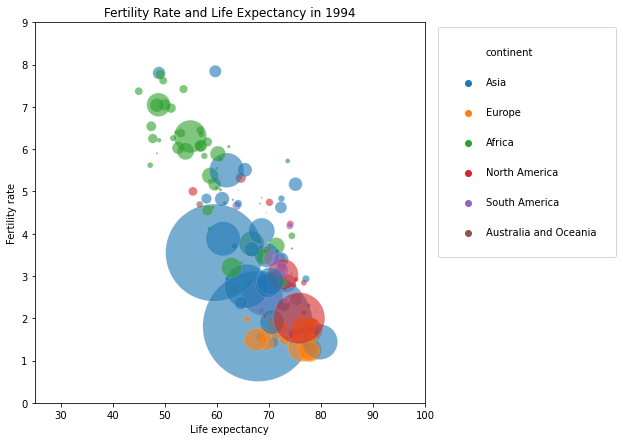

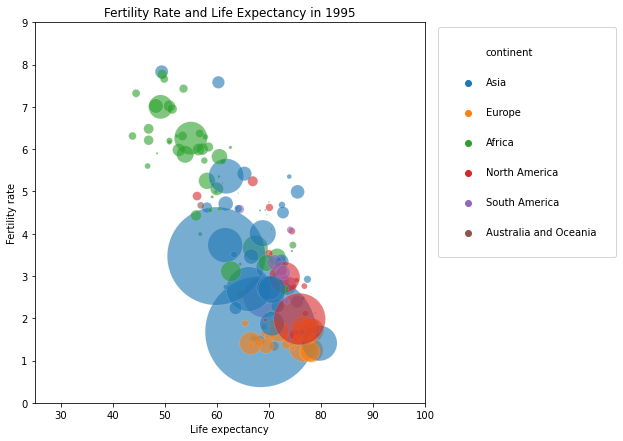

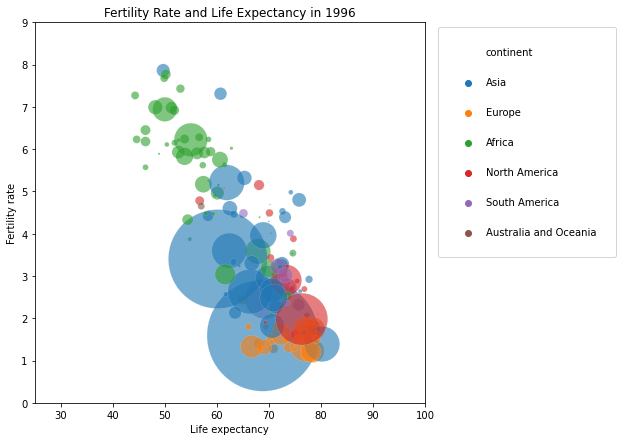

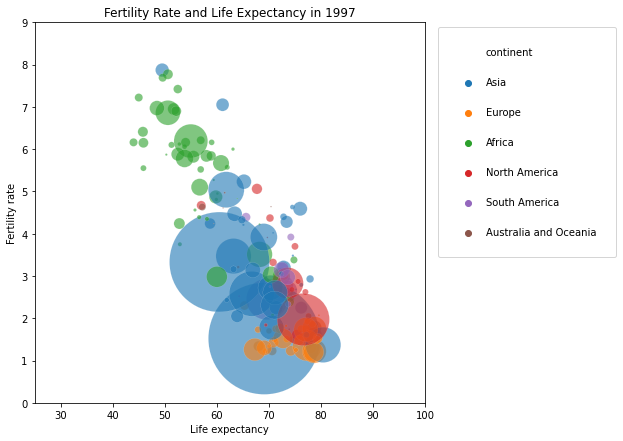

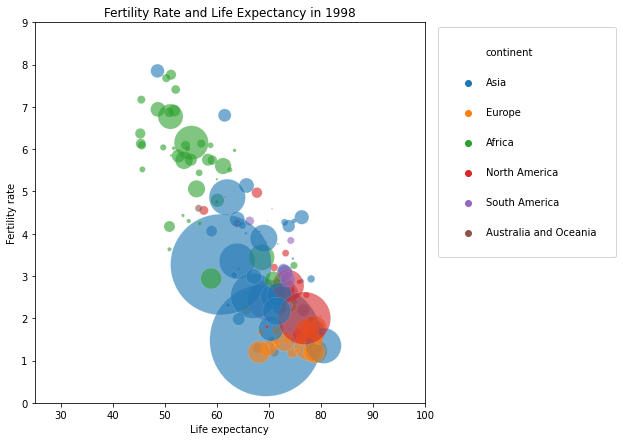

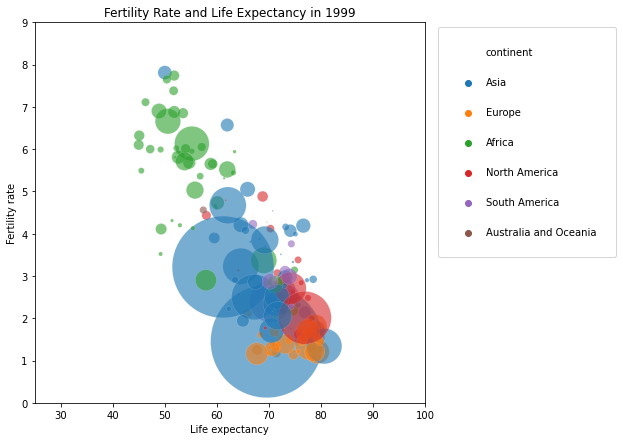

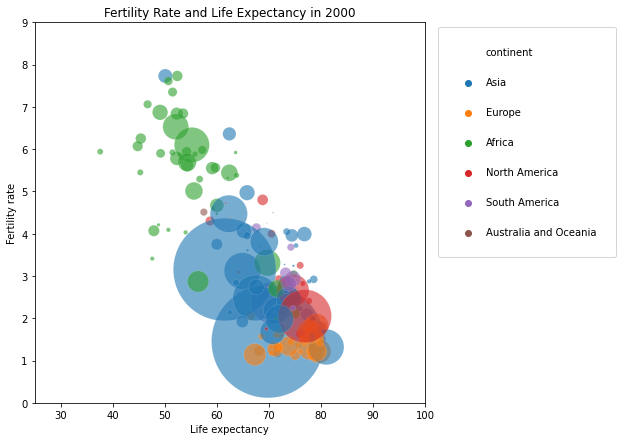

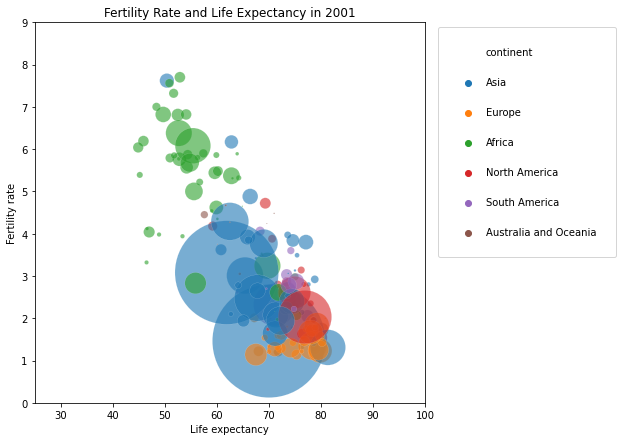

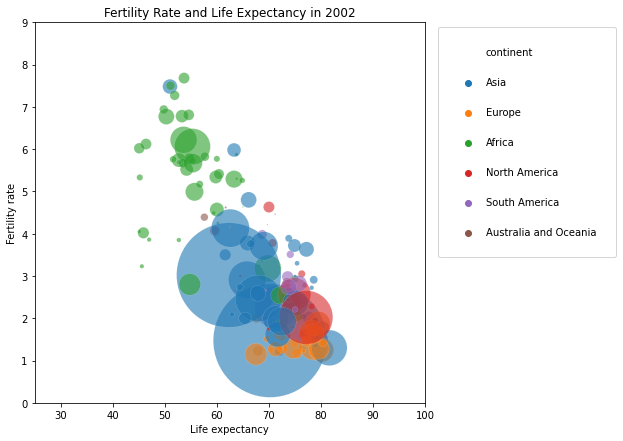

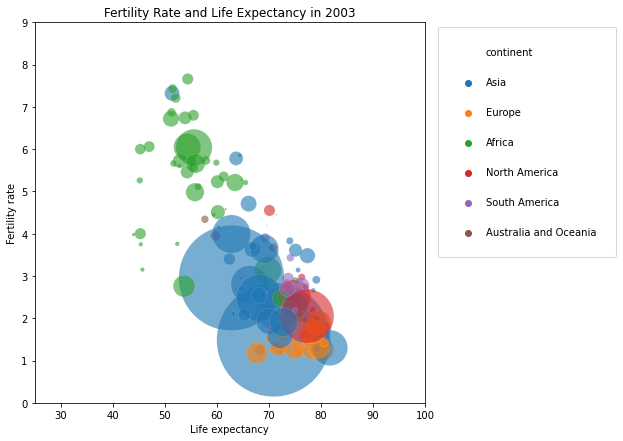

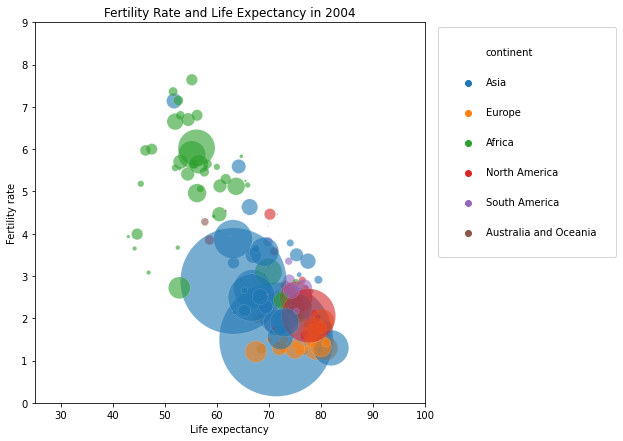

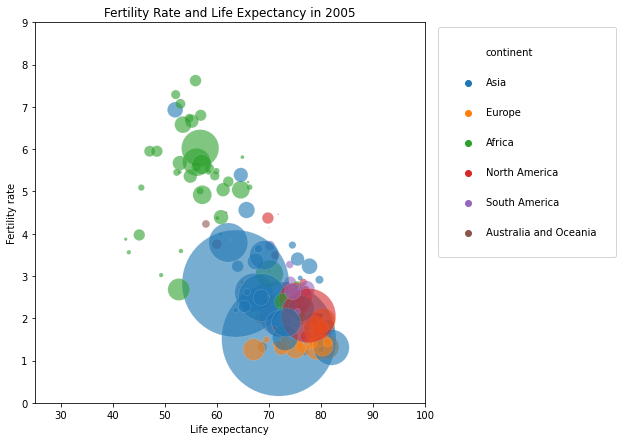

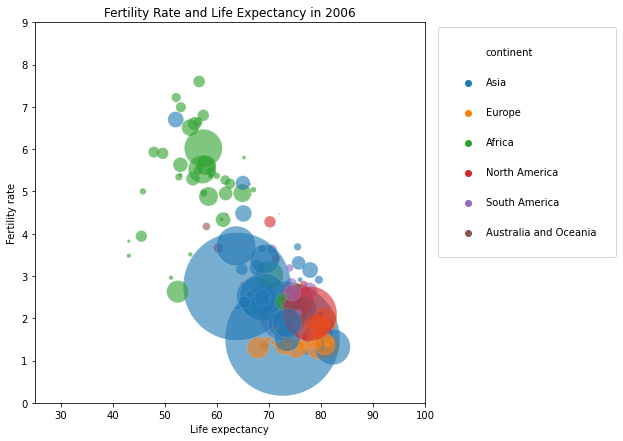

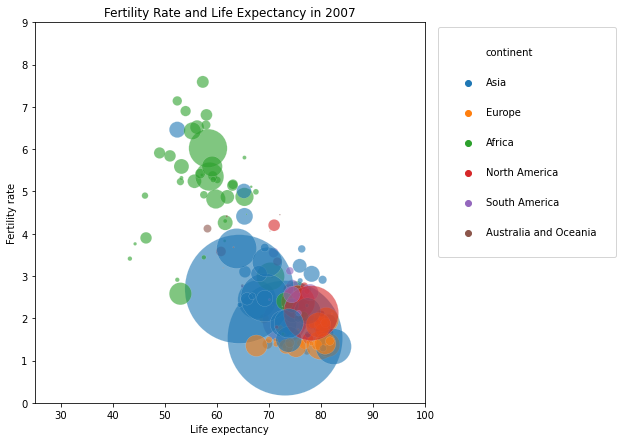

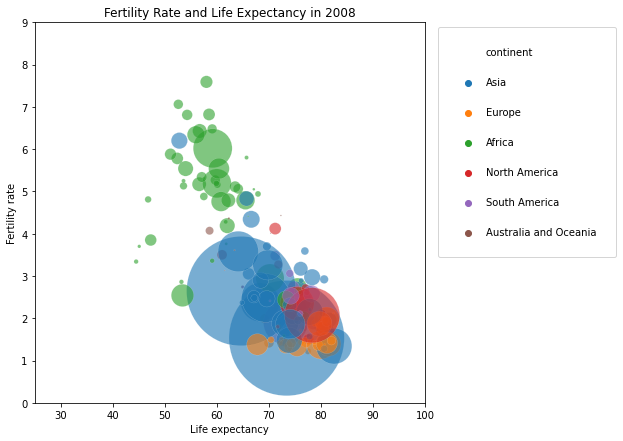

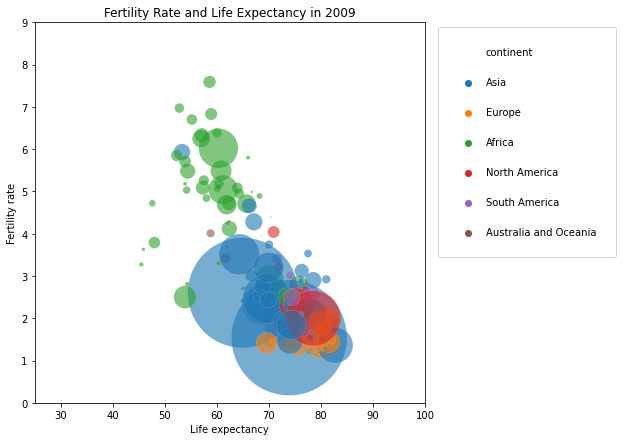

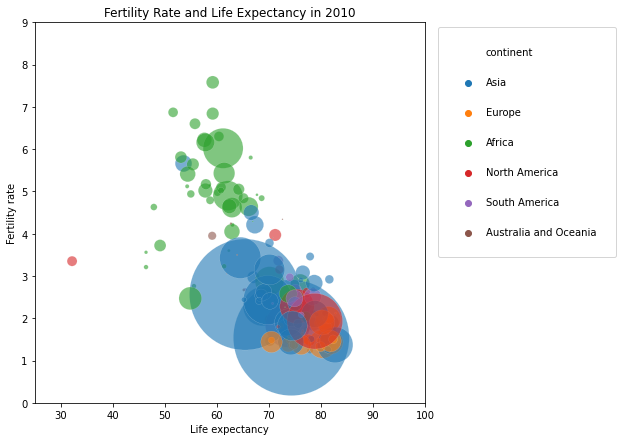

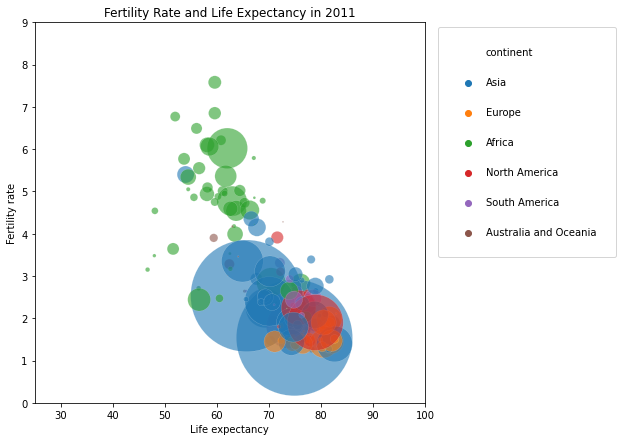

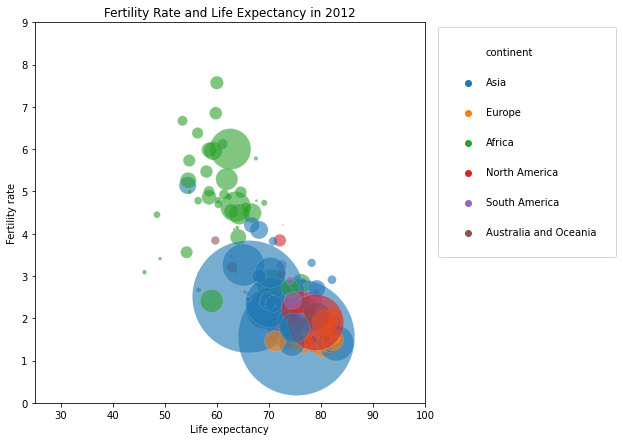

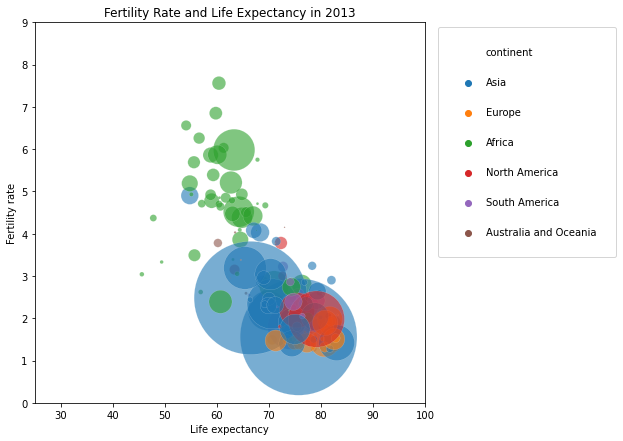

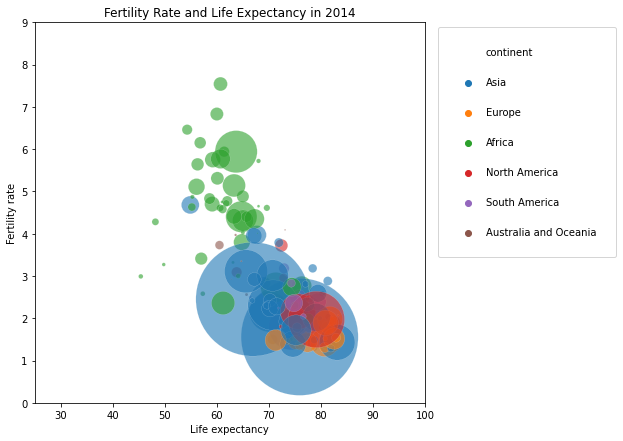

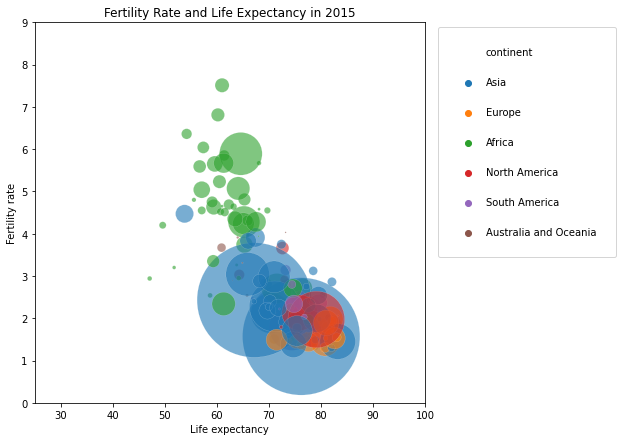

In [133]:
for year in years_list:
    plt.figure(figsize= (7,7))
    sns.scatterplot(x='life_expectancy', y='fertility_rate',
            data=df_all[df_all['year'] == year], alpha=0.6,sizes = dict ,size='population', hue='continent')
    plt.axis((25, 100, 0, 9))
    handles, labels = ax1.get_legend_handles_labels()
    plt.legend([handles[i] for i in range(7)],[labels[i] for i in range(7)],borderpad=2, labelspacing=2, loc='best', bbox_to_anchor=(1.02, 1))
    plt.xlabel('Life expectancy')
    plt.ylabel('Fertility rate')
    plt.title('Fertility Rate and Life Expectancy in ' + str(year))
    plt.savefig(save_path + 'Fertility Rate and Life Expectancy in ' + str(year) + '.png', bbox_inches='tight')
    plt.show()
    plt.close

The resources that helped me figure out how to hide some of the legend 
https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.get_legend_handles_labels.html
https://www.statology.org/matplotlib-legend-order/

In [134]:
images = []

for year in years_list:
    filename = save_path + 'Fertility Rate and Life Expectancy in {}.png'.format(year)
    images.append(imageio.imread(filename))

imageio.mimsave('output.gif', images, fps=15)